In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [4]:
data.shape

(4867421, 28)

In [5]:
data.isnull().values.any()

False

## EDA

## Let's check for each experiment ( CA, DA , SS ) on the crew , 
## How the cognitive states ( CA --> C , DA --> D , SS --> B ) gets induced over time
## Note: A is the baseline state to start with for each experiment.

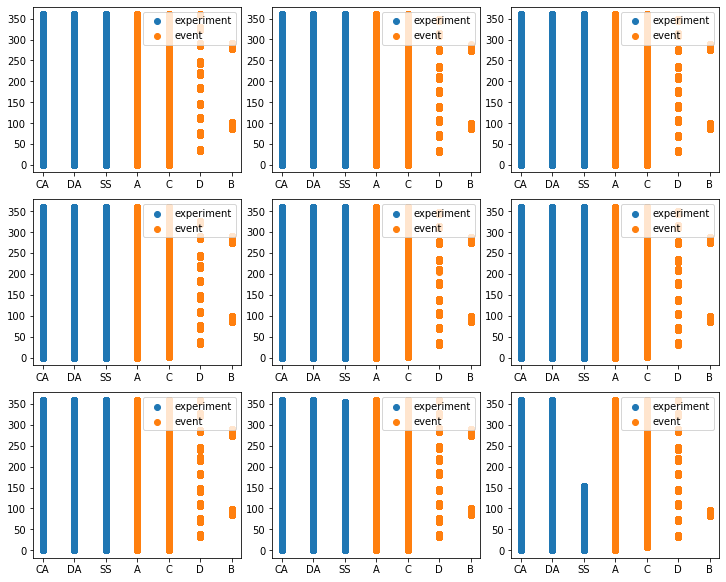

In [331]:
crew_id = dict(data.crew.value_counts())

p=0
plt.figure(figsize=(10,8))
for key, value in crew_id.items():
    
    data_crew = data[ (data.crew == key)]
    
    experiment = data_crew['experiment']
    time = data_crew['time']
    cognitive_state = data_crew['event']

    plt.subplot(3,3,p+1)

    plt.scatter(experiment,time , label = 'experiment')
    plt.scatter(cognitive_state,time , label = 'event')
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    p = p + 1
    plt.legend(loc = "upper right")
    
plt.show()


## Below plotting for indiviual experiments to see behaviour at more granular level.

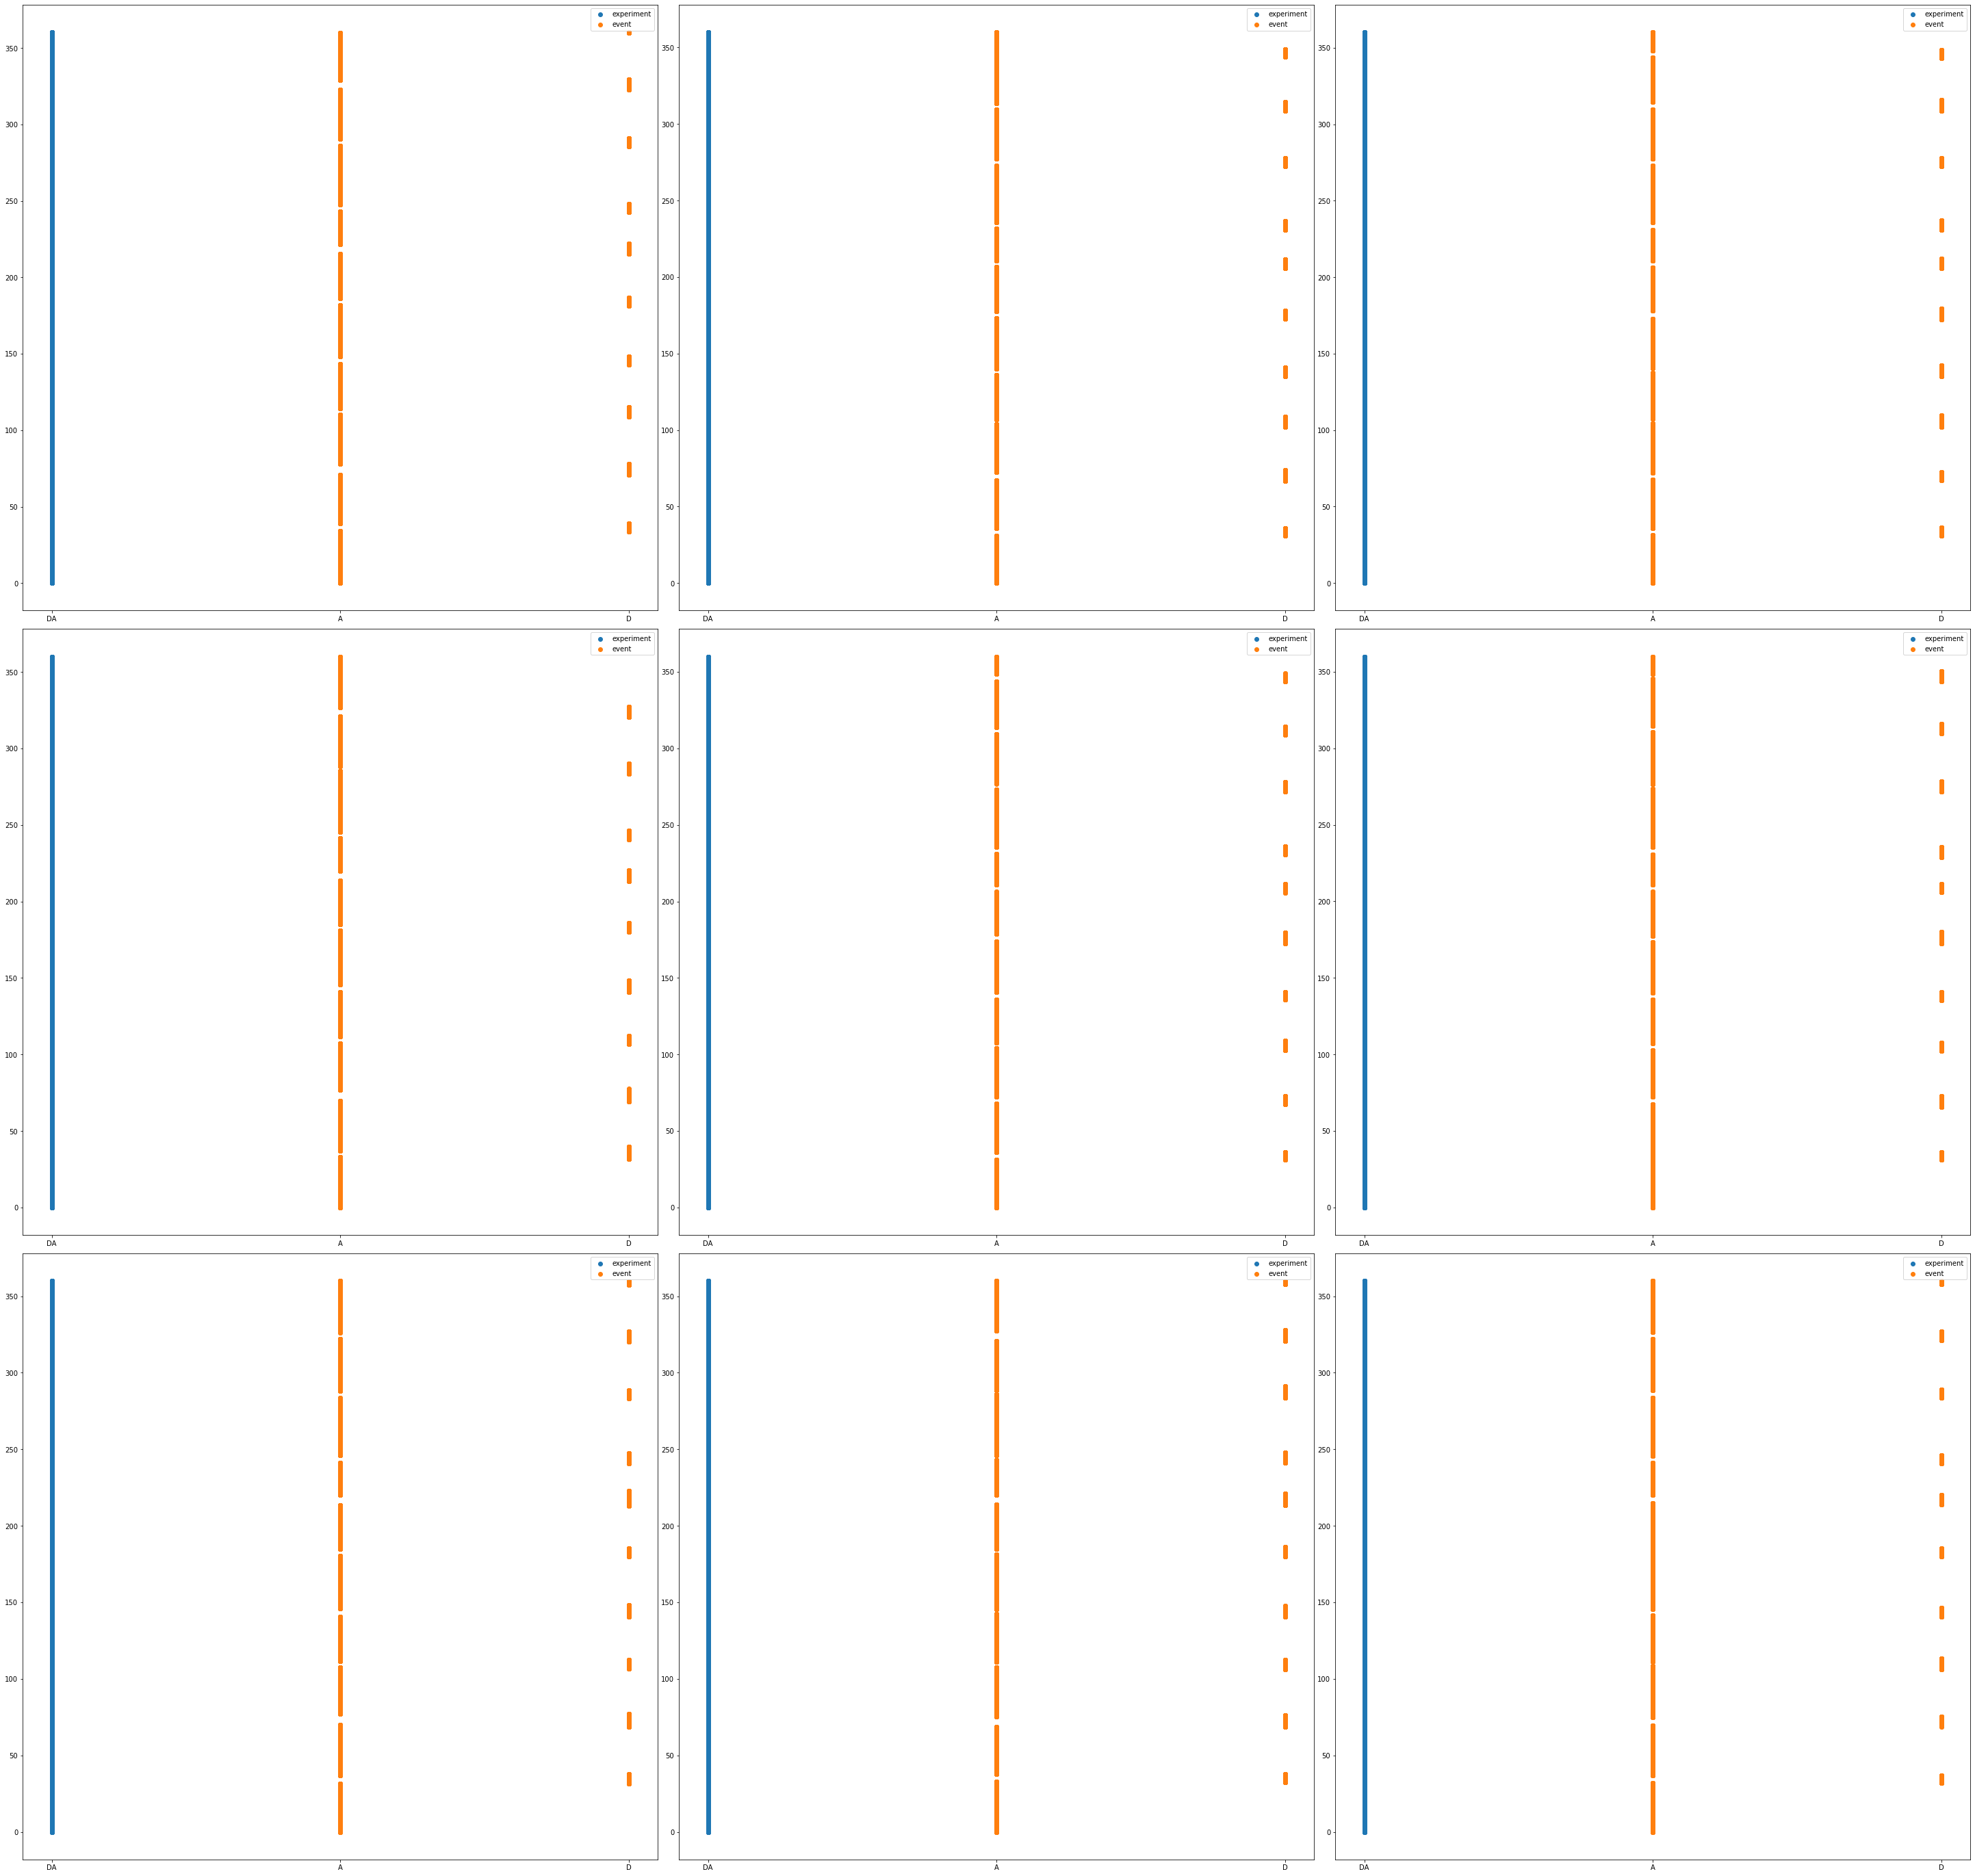

In [113]:
crew_id = dict(data.crew.value_counts())

p=0
plt.figure(figsize=(40,38))
for key, value in crew_id.items():
    
    data_crew = data[ (data.crew == key) & (data.experiment == "DA")]
    
    experiment = data_crew['experiment']
    time = data_crew['time']
    cognitive_state = data_crew['event']

    plt.subplot(3,3,p+1)

    plt.scatter(experiment,time , label = 'experiment')
    plt.scatter(cognitive_state,time , label = 'event')
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    p = p + 1
    plt.legend(loc = "upper right")
    
plt.show()

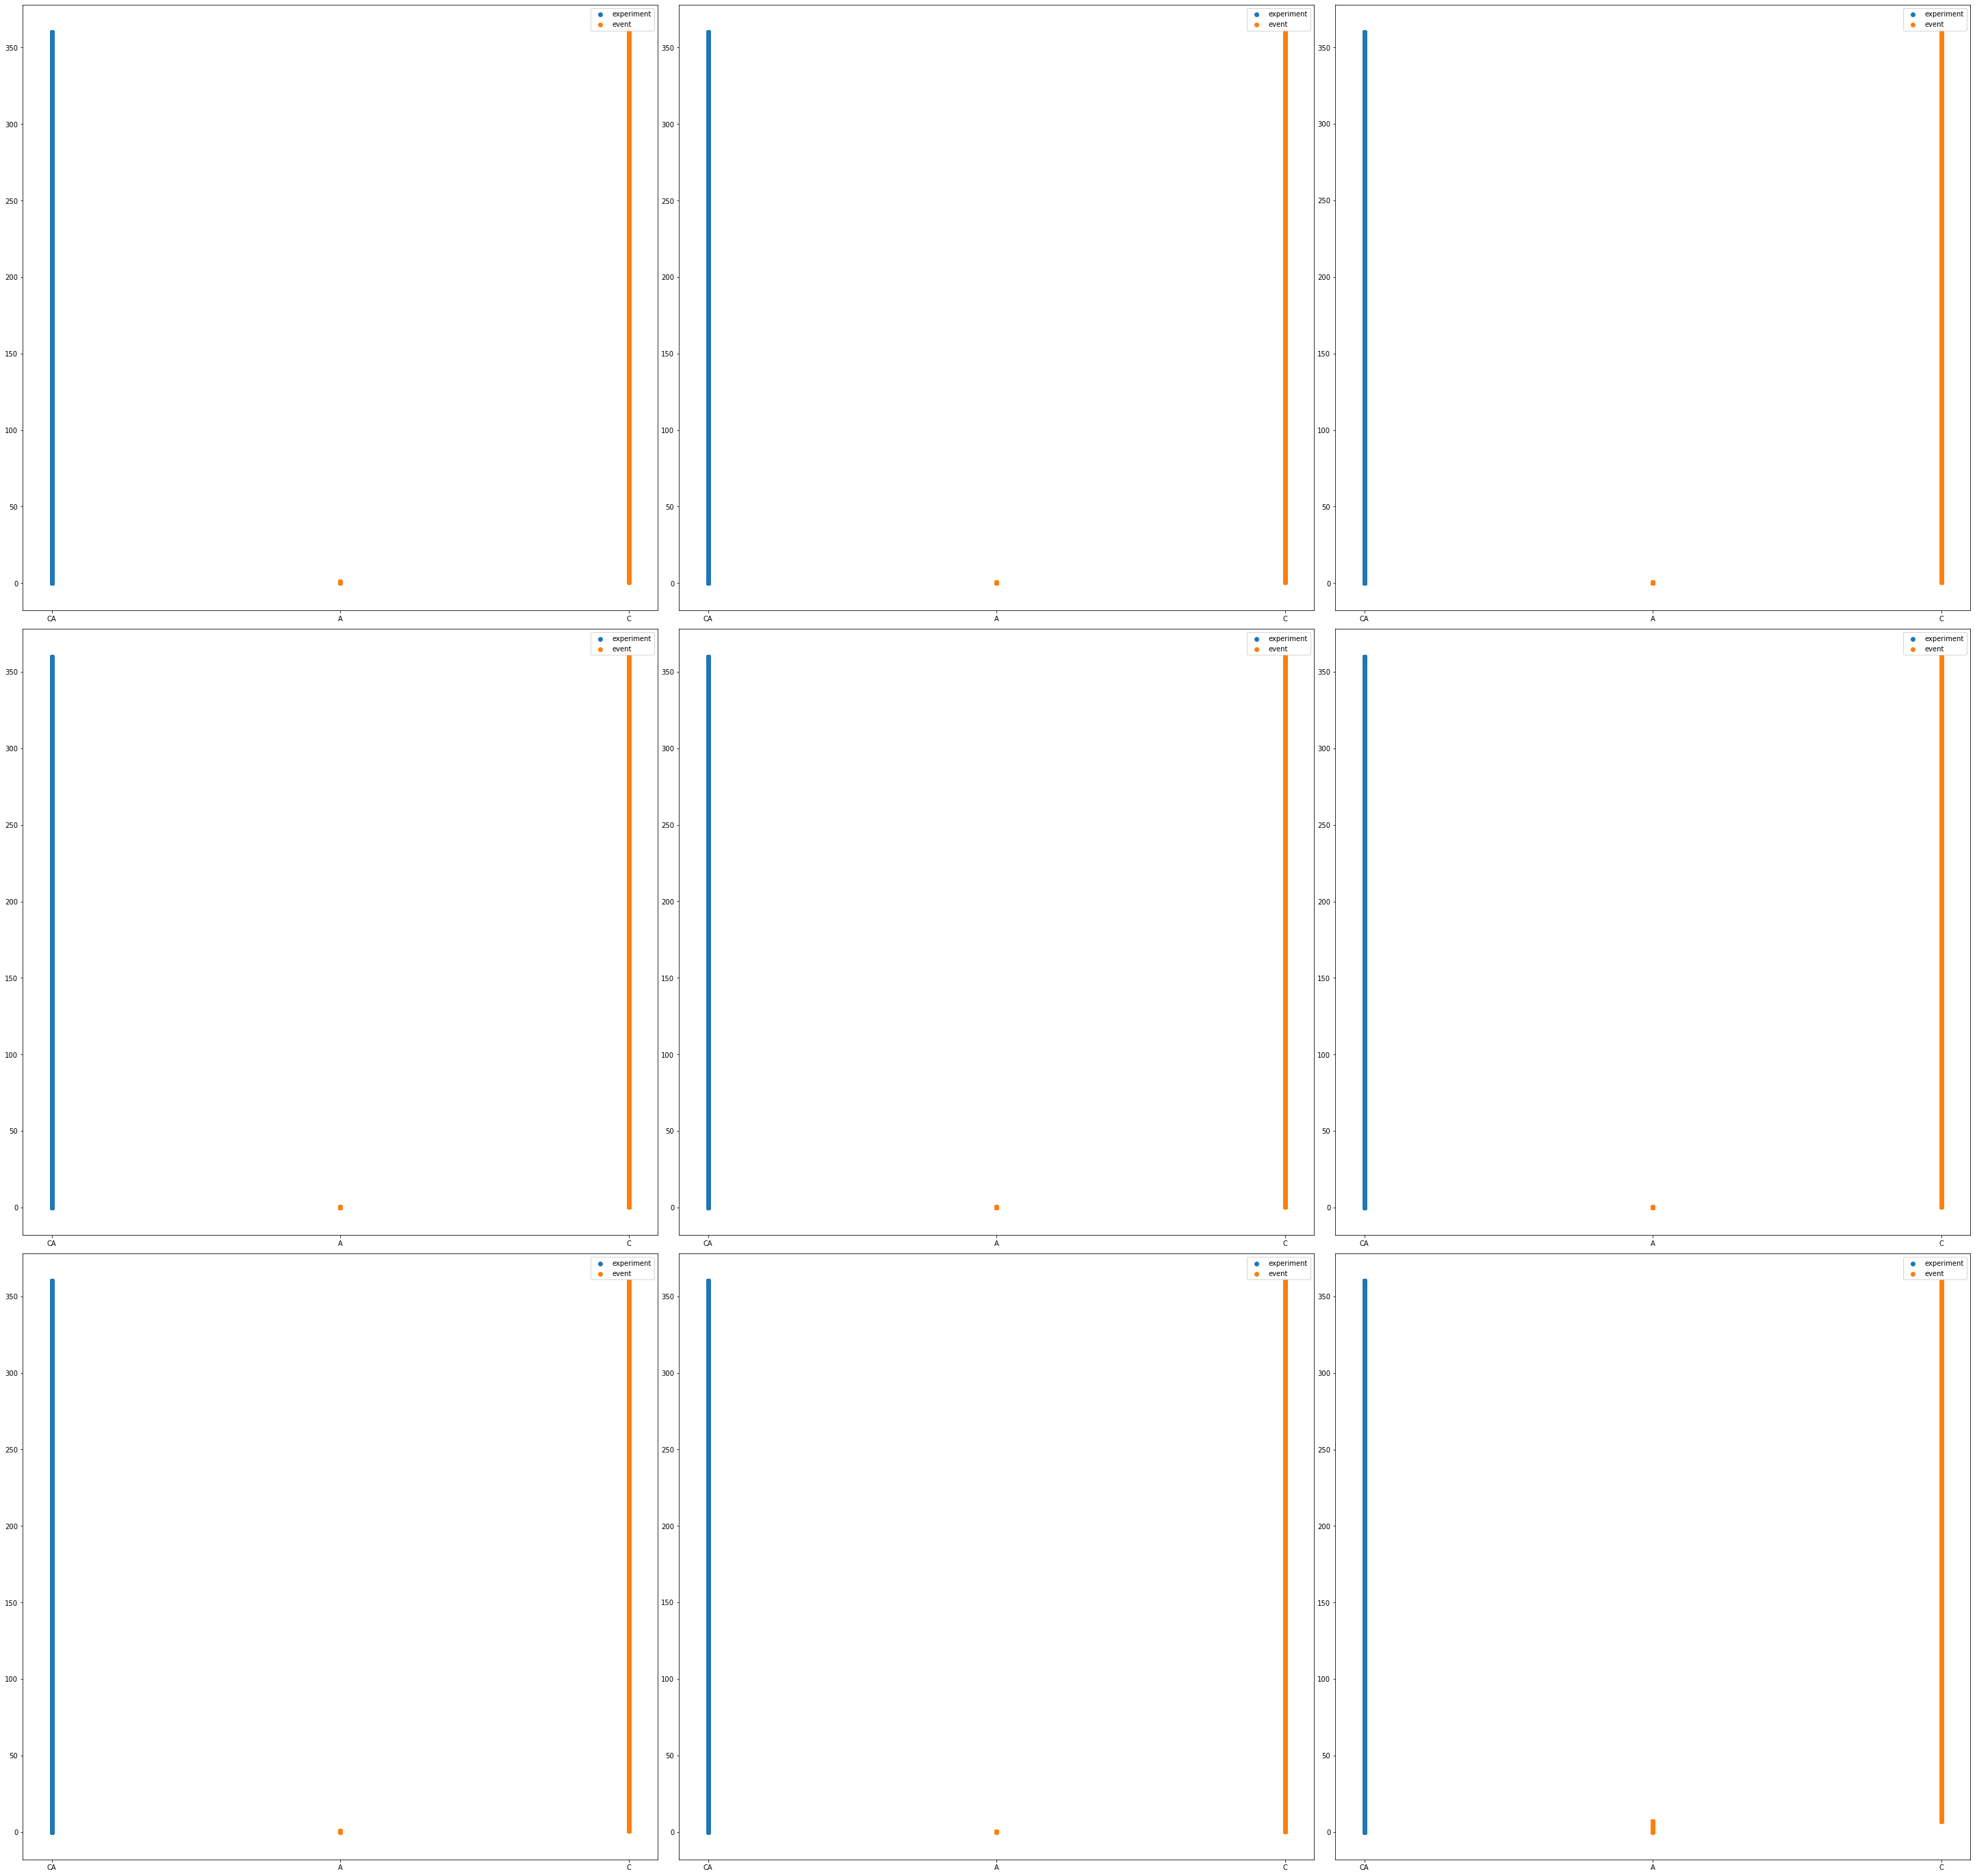

In [114]:
crew_id = dict(data.crew.value_counts())

p=0
plt.figure(figsize=(40,38))
for key, value in crew_id.items():
    
    data_crew = data[ (data.crew == key) & (data.experiment == "CA")]
    
    experiment = data_crew['experiment']
    time = data_crew['time']
    cognitive_state = data_crew['event']

    plt.subplot(3,3,p+1)

    plt.scatter(experiment,time , label = 'experiment')
    plt.scatter(cognitive_state,time , label = 'event')
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    p = p + 1
    plt.legend(loc = "upper right")
    
plt.show()

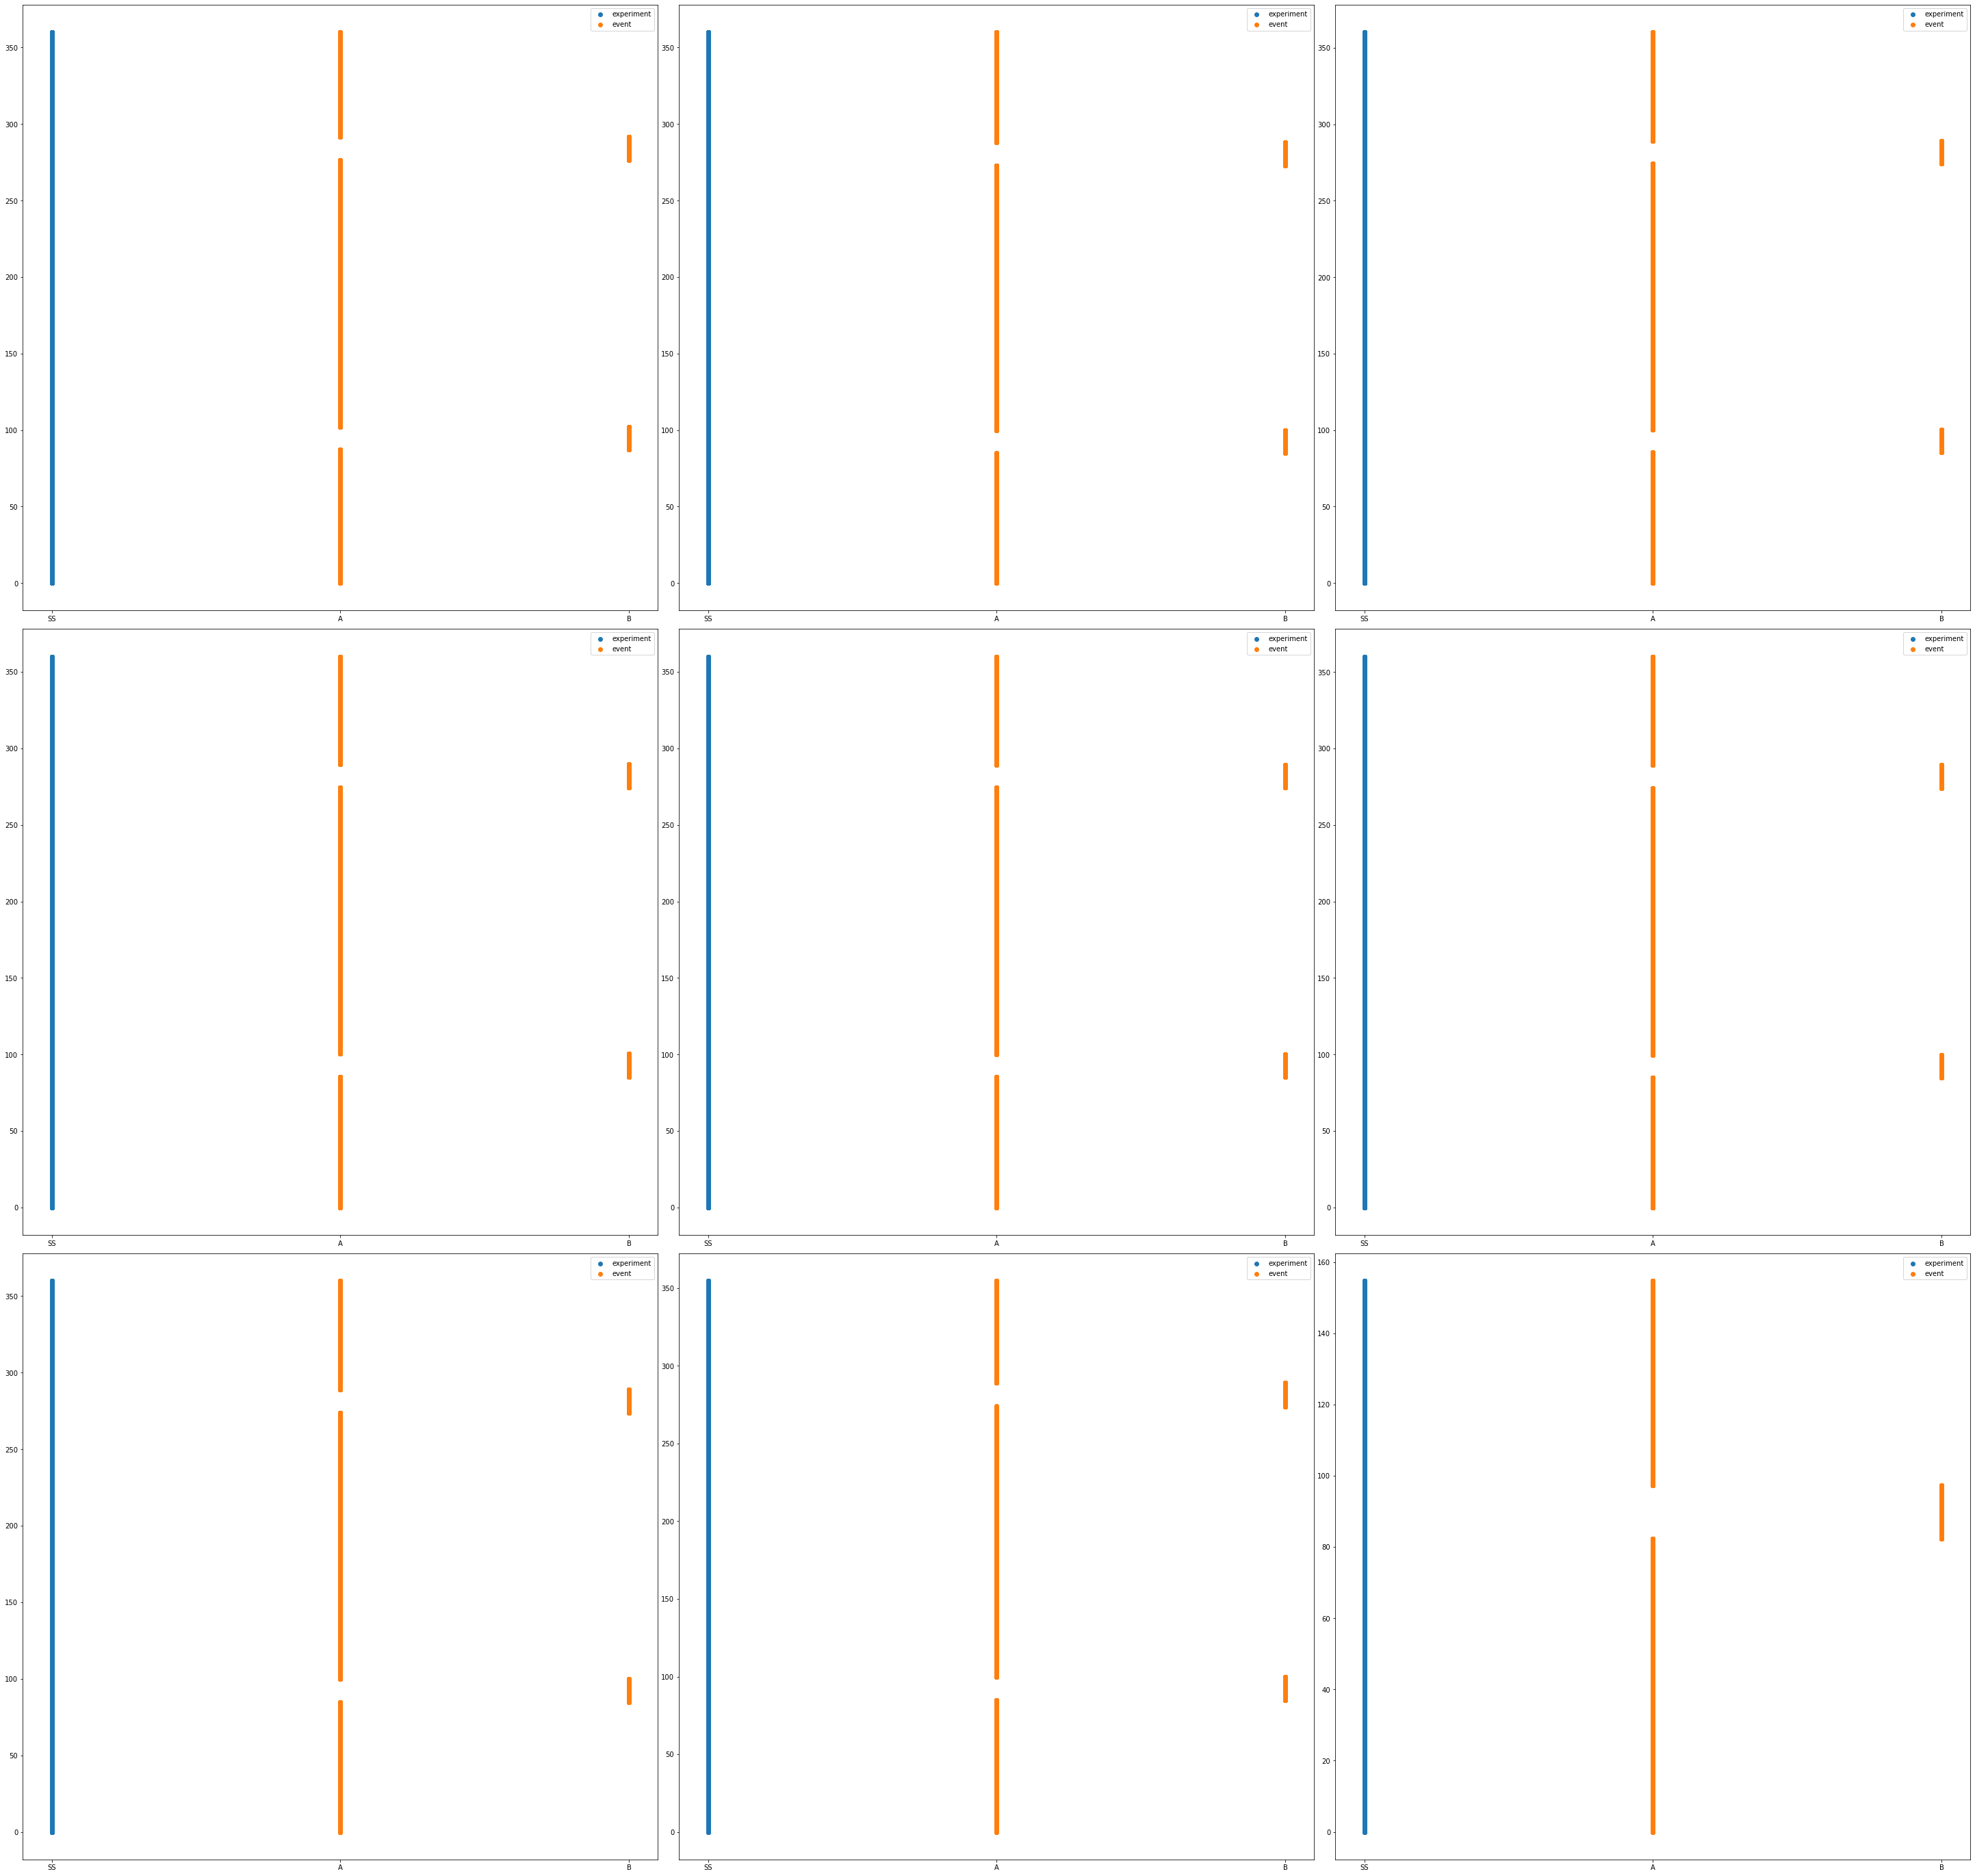

In [115]:
crew_id = dict(data.crew.value_counts())

p=0
plt.figure(figsize=(40,38))
for key, value in crew_id.items():
    
    data_crew = data[ (data.crew == key) & (data.experiment == "SS")]
    
    experiment = data_crew['experiment']
    time = data_crew['time']
    cognitive_state = data_crew['event']

    plt.subplot(3,3,p+1)

    plt.scatter(experiment,time , label = 'experiment')
    plt.scatter(cognitive_state,time , label = 'event')
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    p = p + 1
    plt.legend(loc = "upper right")
    
plt.show()

# Observations from above graphs
## C : This state is channelised attention and as graphs show that it is induced very early and persists over time. This is evident from the fact that, in the this experiment crew play some engaging puzzle game where they start their focus and persist with it for longer duration.
## D: In Diverted attention, what we see from graph is that this state appears and stays for short duration then again crews shift to baseline state. This behaviour occurs very frequently throughout the experiment.
## B : This is Startle surprise state. In this experiment crew watched movie clips with jump scares to inject surprise state. Graphs show that it occurs very rarely during the experiment and this is also inline with the relation of experiment and state.

In [250]:
data.event.value_counts()

A    2848809
C    1652686
D     235329
B     130597
Name: event, dtype: int64

## By seeing the numbers of our classes (A, B , C ,D) it clearly shows that there's imbalance in data but as we saw in above graph that it is due to the nature and relation between experiment and state. So we should build model keeping the nature of the data preserved and not try to balance it.

## Let's check for any specific relation between seat and the cognitive state

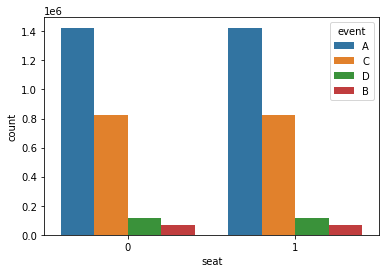

In [254]:
sns.countplot(x = "seat" , hue = "event" , data = data)

## From above graph we can see that the cognitive state doesn't seem to vary with seat's position.

## Now let's filter the ecg , r , and gsr data and analyse them

In [1]:
def filter_lowpass(data,cutoff,n):
    
    b, a = signal.butter(n, cutoff, btype='low',fs = 256)

    filtered = signal.filtfilt(b, a, data)
    
    return filtered
    

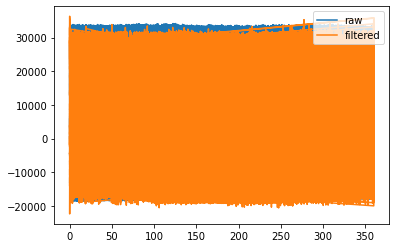

In [3]:
from scipy import signal

N = 4
cutoff_lowpass = 100  

y_ecg = filter_lowpass(data['ecg'],cutoff_lowpass,N)

plt.plot(data.time,data.ecg,label='raw')
plt.plot(data.time,y_ecg,label='filtered')
plt.legend(loc = "upper right")



## We will now check by zooming in how the filter worked by comparing filtered and raw ecg data for one pilot and shorter time interval

In [72]:
data_crew4_seat1 = data.loc[ (data.crew == 4) & (data.experiment == 'SS') & (data.seat == 1) & (data['time'].between(10.1,10.2))]

N = 4
cutoff_lowpass = 100  
 

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_filt_low = signal.filtfilt(b, a, data_crew4_seat1['ecg'])


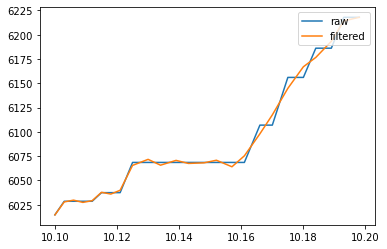

In [73]:
plt.plot(data_crew4_seat1.time,data_crew4_seat1.ecg,label='raw')
plt.plot(data_crew4_seat1.time,y_filt_low,label='filtered')
plt.legend(loc = "upper right")

## So we can see that how filter has removed the noise (those small small peaks visible in blue line) from ecg and at the same time maintaining the identity of the data. Hence the orange line is the filtered ecg signal.

## Now filter r and gsr also.

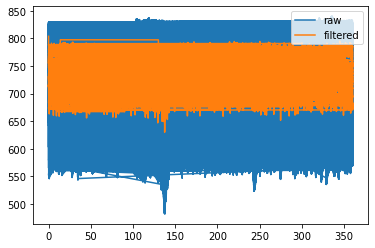

In [4]:
from scipy import signal
N = 5
cutoff_lowpass = 1 # https://www.researchgate.net/figure/a-The-output-signals-original-waveform-of-the-respiration-sensor-recorded-by-the-data_fig4_309718763

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_r = signal.filtfilt(b, a, data['r'])

plt.plot(data.time,data.r,label='raw')
plt.plot(data.time,y_r,label='filtered')
plt.legend(loc = "upper right")

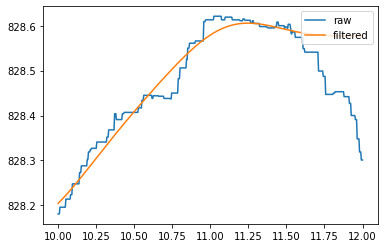

In [81]:
N = 5
cutoff_lowpass = 1

data_crew4_seat1 = data.loc[ (data.crew == 4) & (data.experiment == 'DA') & (data.seat == 1) & (data['time'].between(10,12))]

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_r_filt = signal.filtfilt(b, a, data_crew4_seat1['r'])

plt.plot(data_crew4_seat1.time,data_crew4_seat1.r,label='raw')
plt.plot(data_crew4_seat1.time,y_r_filt,label='filtered')
plt.legend(loc = "upper right")

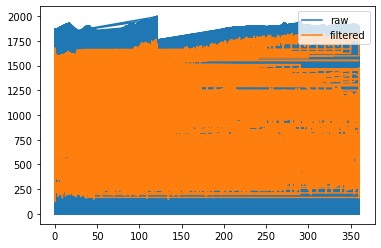

In [5]:
N = 3
cutoff_lowpass = 2 # https://www.eurasip.org/Proceedings/Eusipco/Eusipco2018/papers/1570439366.pdf

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_gsr = signal.filtfilt(b, a, data['gsr'])

plt.plot(data.time,data.gsr,label='raw')
plt.plot(data.time,y_gsr,label='filtered')
plt.legend(loc = "upper right")

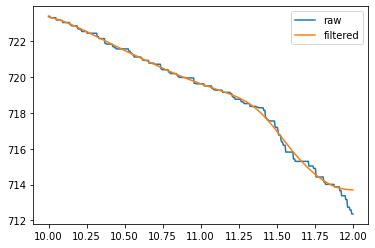

In [83]:
N = 3
cutoff_lowpass = 2

data_crew4_seat1 = data.loc[ (data.crew == 4) & (data.experiment == 'DA') & (data.seat == 1) & (data['time'].between(10,12))]

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_gsr_filt = signal.filtfilt(b, a, data_crew4_seat1['gsr'])

plt.plot(data_crew4_seat1.time,data_crew4_seat1.gsr,label='raw')
plt.plot(data_crew4_seat1.time,y_gsr_filt,label='filtered')
plt.legend(loc = "upper right")

In [35]:
data['ecg_filtered'] = y_ecg
data['r_filtered'] = y_r
data['gsr_filtered'] = y_gsr

In [85]:
data.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event,ecg_filtered,r_filtered,gsr_filtered
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A,-4520.037777,803.835173,386.802090
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A,-4519.973061,803.346371,387.930633
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A,-4519.993000,802.852512,389.129531
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A,-4520.058504,802.353682,390.399935
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A,-4519.892042,801.849969,391.742906


## Next we can check behaviour of ecg w.r.t cognitive state for any pilot.

In [92]:
data_crew2_seat0_CA = data[ (data.crew == 2) & (data.seat == 0) & (data.experiment == "CA")]

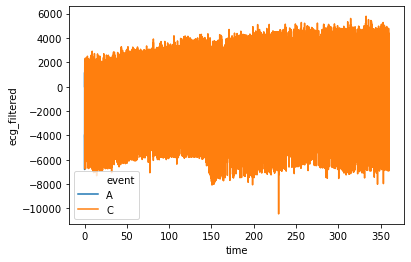

In [93]:
sns.lineplot(data=data_crew2_seat0_CA, x="time", y="ecg_filtered", hue="event")

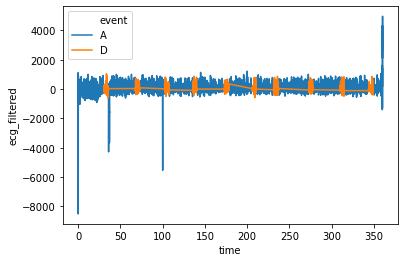

In [399]:
data_crew2_seat0_DA = data[ (data.crew == 2) & (data.seat == 0) & (data.experiment == "DA")]
sns.lineplot(data=data_crew2_seat0_DA, x="time", y="ecg_filtered", hue="event")

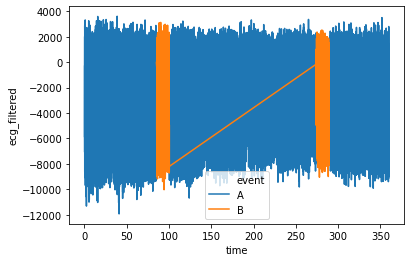

In [400]:
data_crew2_seat0_SS = data[ (data.crew == 2) & (data.seat == 0) & (data.experiment == "SS")]
sns.lineplot(data=data_crew2_seat0_SS, x="time", y="ecg_filtered", hue="event")

## Above graphs doesn't provide any useful information of how cognitive states are changing with ecg readings.

# Let's check behaviour of r w.r.t cognitive state.

### Experiment CA and feature 'r'

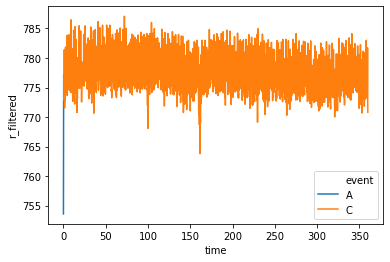

In [95]:
sns.lineplot(data=data_crew2_seat0_CA, x="time", y="r_filtered", hue="event")

## Above graph shows some difference in respiration behaviour between event A and C. So Lets see above plot for different pilots and observe above analomaly is visible or not. 

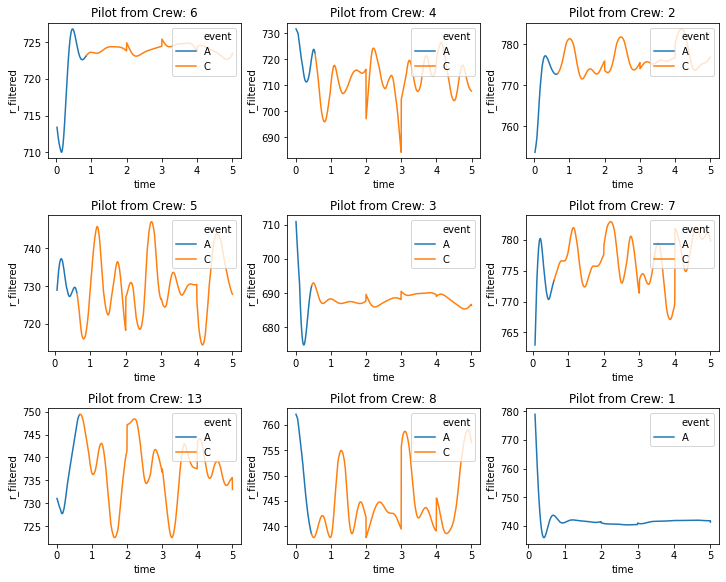

In [108]:
crew_id = dict(data.crew.value_counts())

p=0
plt.figure(figsize=(10,8))
for key, value in crew_id.items():
    
    data_crew = data[ (data.crew == key) & (data.seat == 0) & (data.experiment == "CA") & (data.time.between(0,5))]
    
    plt.subplot(3,3,p+1)

    sns.lineplot(data=data_crew, x="time", y="r_filtered", hue="event")
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    p = p + 1
    plt.legend(loc = "upper right")
    plt.title("Pilot from Crew: "+str(key))
    
plt.show()

## So above plots show that behaviour is different for different pilots. Pilots from crew 6 , 2 , 7  show similar behaviour and pilot from crew 3 and 8 show opposite behaviour. Other pilots from crew 5 and 13 show different pattern. Overall its subjective respiratory behaviour of a person , how he/she responds in that situation.

### Experiment DA and feature 'r'

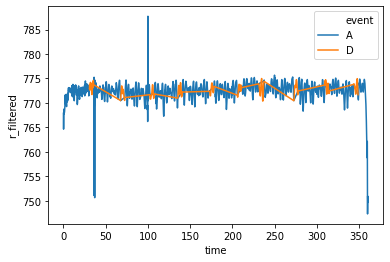

In [386]:
sns.lineplot(data=data_crew2_seat0_DA, x="time", y="r_filtered", hue="event")

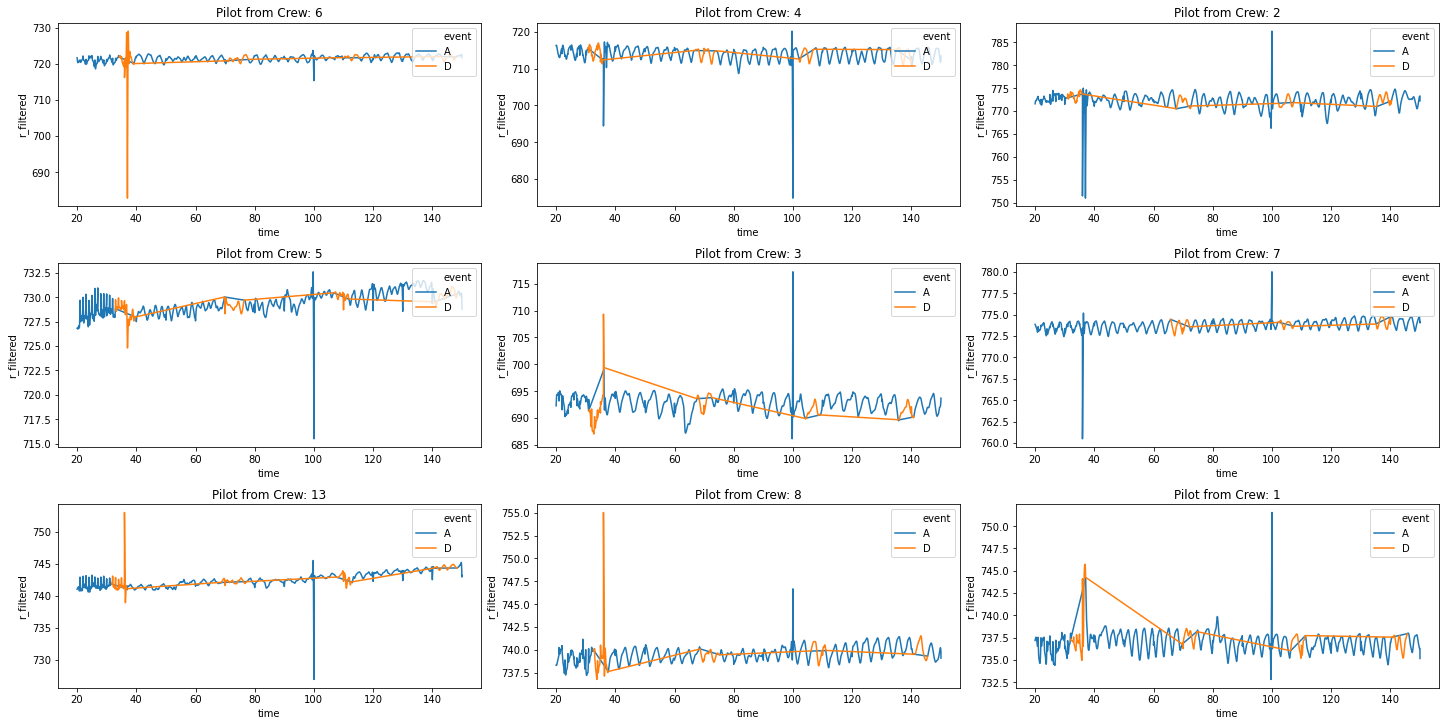

In [118]:
crew_id = dict(data.crew.value_counts())

p=0
plt.figure(figsize=(20,10))
for key, value in crew_id.items():
    
    data_crew = data[ (data.crew == key) & (data.seat == 0) & (data.experiment == "DA") & (data.time.between(20,150))]
    
    plt.subplot(3,3,p+1)

    sns.lineplot(data=data_crew, x="time", y="r_filtered", hue="event")
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    p = p + 1
    plt.legend(loc = "upper right")
    plt.title("Pilot from Crew: "+str(key))
    
plt.show()

### Experiment SS and feature 'r'

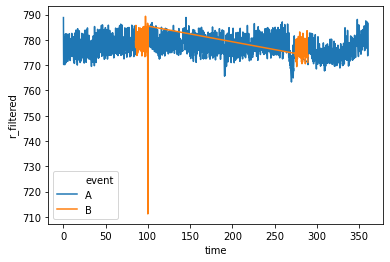

In [393]:
sns.lineplot(data=data_crew2_seat0_SS, x="time", y="r_filtered", hue="event")

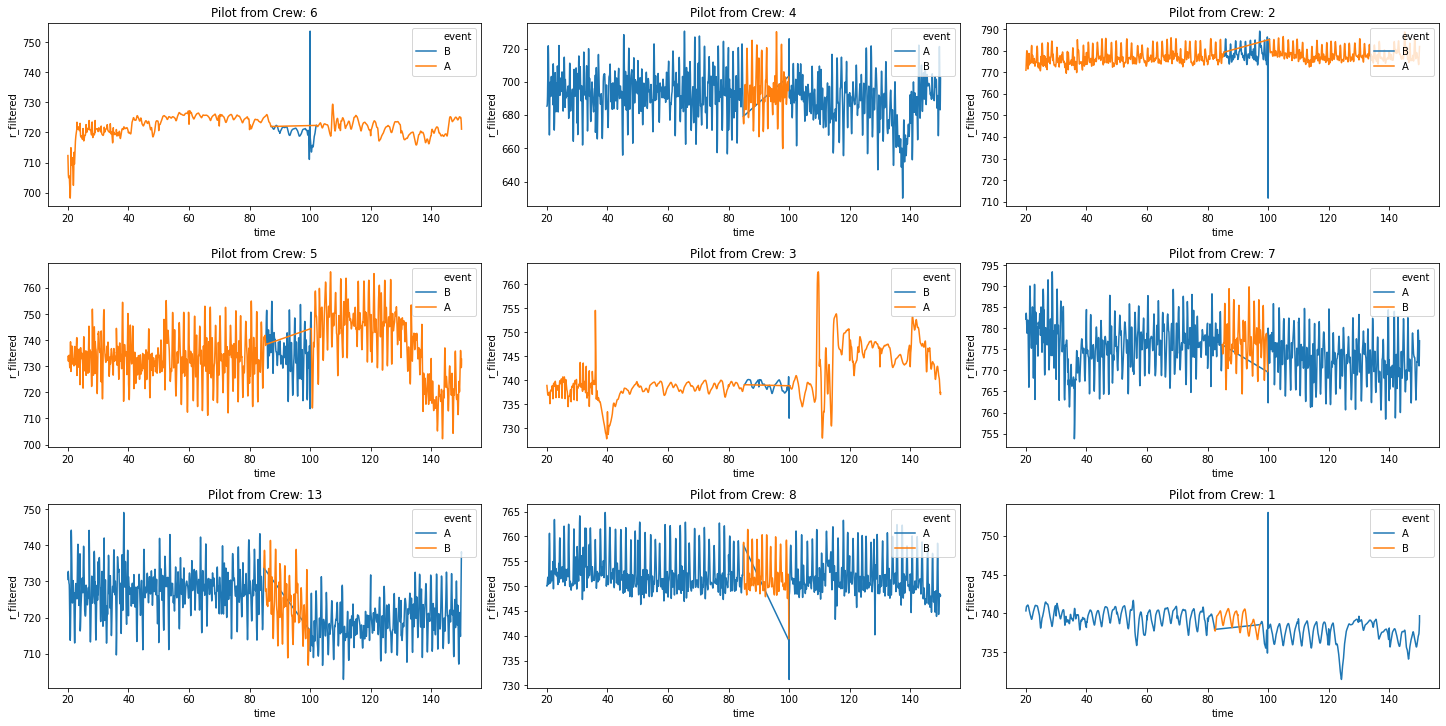

In [119]:
crew_id = dict(data.crew.value_counts())

p=0
plt.figure(figsize=(20,10))
for key, value in crew_id.items():
    
    data_crew = data[ (data.crew == key) & (data.seat == 0) & (data.experiment == "SS") & (data.time.between(20,150))]
    
    plt.subplot(3,3,p+1)

    sns.lineplot(data=data_crew, x="time", y="r_filtered", hue="event")
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    p = p + 1
    plt.legend(loc = "upper right")
    plt.title("Pilot from Crew: "+str(key))
    
plt.show()

## Conclusion: Looking at each individual graphs, one can see that the behaviour is subjective  for different pilots and single feature like ecg , r or gsr cannot give some specific pattern which can be used to identify difference in behaviour of cognitive state and baseline state.

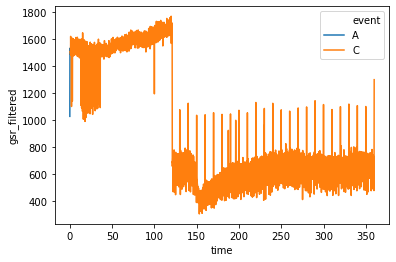

In [388]:
sns.lineplot(data=data_crew2_seat0_CA, x="time", y="gsr_filtered", hue="event")

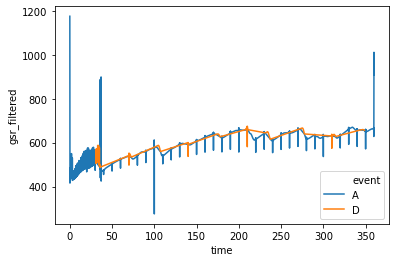

In [389]:
sns.lineplot(data=data_crew2_seat0_DA, x="time", y="gsr_filtered", hue="event")

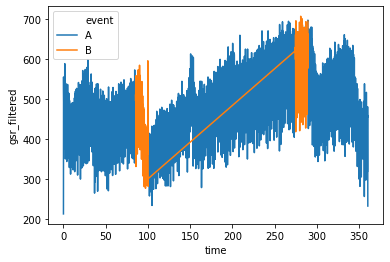

In [418]:
sns.lineplot(data=data_crew2_seat0_SS, x="time", y="gsr_filtered", hue="event")

## We can conclude that graphs for ecg , r and gsr didn't provide any specific pattern difference between baseline event and other cognitive states over time.

## Check for any specific behaviour between ecg , r and gsr

# Between r and ecg

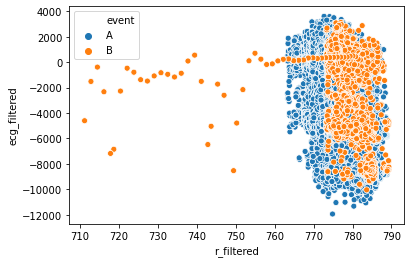

In [420]:
sns.scatterplot(data=data_crew2_seat0_SS, x="r_filtered", y="ecg_filtered", hue="event")

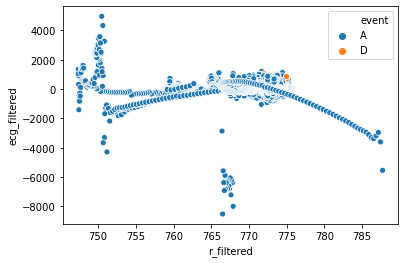

In [423]:
data_crew2_seat0_DA = data[ (data.crew == 2) & (data.seat == 0) & (data.experiment == "DA")]
sns.scatterplot(data=data_crew2_seat0_DA, x="r_filtered", y="ecg_filtered", hue="event")

# Between gsr and ecg

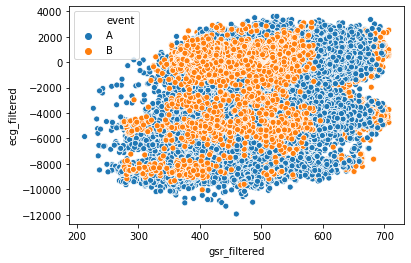

In [421]:
sns.scatterplot(data=data_crew2_seat0_SS, x="gsr_filtered", y="ecg_filtered", hue="event")

## Between gsr and r

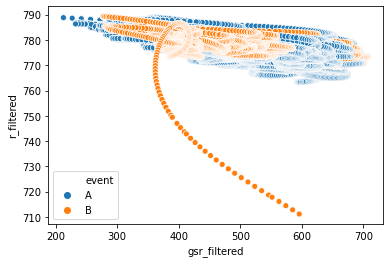

In [424]:
sns.scatterplot(data=data_crew2_seat0_SS, x="gsr_filtered", y="r_filtered", hue="event")

## Above graphs mostly show overlaps hence not much of a difference in behaviour

## Removing noise from EEG signals now

In [12]:

def filter_bycolumnindex(dataset,columnName):
    
    N = 4
    cutoff_lowpass = 100 # Humain brain generates lower frequency and researchers suggest to analyse eeg signal
    #frequency upto half of sampling frequency and some even suggest for one third ,
    #so i am taking cutoff between 1/2 and 1/3 of sampling freuency (250 Hz in our case)
    #as referred in the blog https://imotions.com/blog/eeg/

    b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 250)

    filtered_feature = signal.filtfilt(b, a, dataset[columnName])
    
    return filtered_feature

In [10]:
eeg_features = ['eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2']

In [8]:
for eeg_f in eeg_features:
    
    filtered_eeg = filter_bycolumnindex(data,eeg_f)
    
    data[eeg_f+'_filtered'] = filtered_eeg
     

## Verifying how the filter performed here.

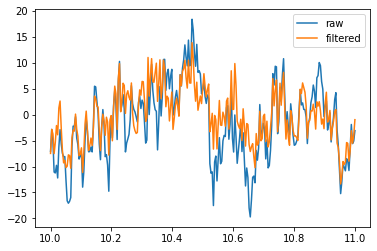

In [451]:
data_crew4_seat1 = data.loc[ (data.crew == 4) & (data.experiment == 'DA') & (data.seat == 1) & (data['time'].between(10,11))]

plt.plot(data_crew4_seat1.time,data_crew4_seat1.eeg_fp1,label='raw')
plt.plot(data_crew4_seat1.time,data_crew4_seat1.eeg_fp1_filtered,label='filtered')
plt.legend(loc = "upper right")

## filter seems to have worked well here also

In [9]:
data.columns

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event',
       'eeg_fp1_filtered', 'eeg_f7_filtered', 'eeg_f8_filtered',
       'eeg_t4_filtered', 'eeg_t6_filtered', 'eeg_t5_filtered',
       'eeg_t3_filtered', 'eeg_fp2_filtered', 'eeg_o1_filtered',
       'eeg_p3_filtered', 'eeg_pz_filtered', 'eeg_f3_filtered',
       'eeg_fz_filtered', 'eeg_f4_filtered', 'eeg_c4_filtered',
       'eeg_p4_filtered', 'eeg_poz_filtered', 'eeg_c3_filtered',
       'eeg_cz_filtered', 'eeg_o2_filtered'],
      dtype='object')

In [10]:
data.drop(['eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr'],axis=1,inplace=True)

In [456]:
data.to_csv('data_filtered.csv')

## Correlation matrix

In [13]:
y = data.drop(['event'],axis=1,inplace=True)

In [11]:
import phik
from phik import resources, report

interval columns not set, guessing: ['crew', 'time', 'seat', 'eeg_fp1_filtered', 'eeg_f7_filtered', 'eeg_f8_filtered', 'eeg_t4_filtered', 'eeg_t6_filtered', 'eeg_t5_filtered', 'eeg_t3_filtered', 'eeg_fp2_filtered', 'eeg_o1_filtered', 'eeg_p3_filtered', 'eeg_pz_filtered', 'eeg_f3_filtered', 'eeg_fz_filtered', 'eeg_f4_filtered', 'eeg_c4_filtered', 'eeg_p4_filtered', 'eeg_poz_filtered', 'eeg_c3_filtered', 'eeg_cz_filtered', 'eeg_o2_filtered', 'ecg_filtered', 'r_filtered', 'gsr_filtered']


/Users/vijaykumar/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


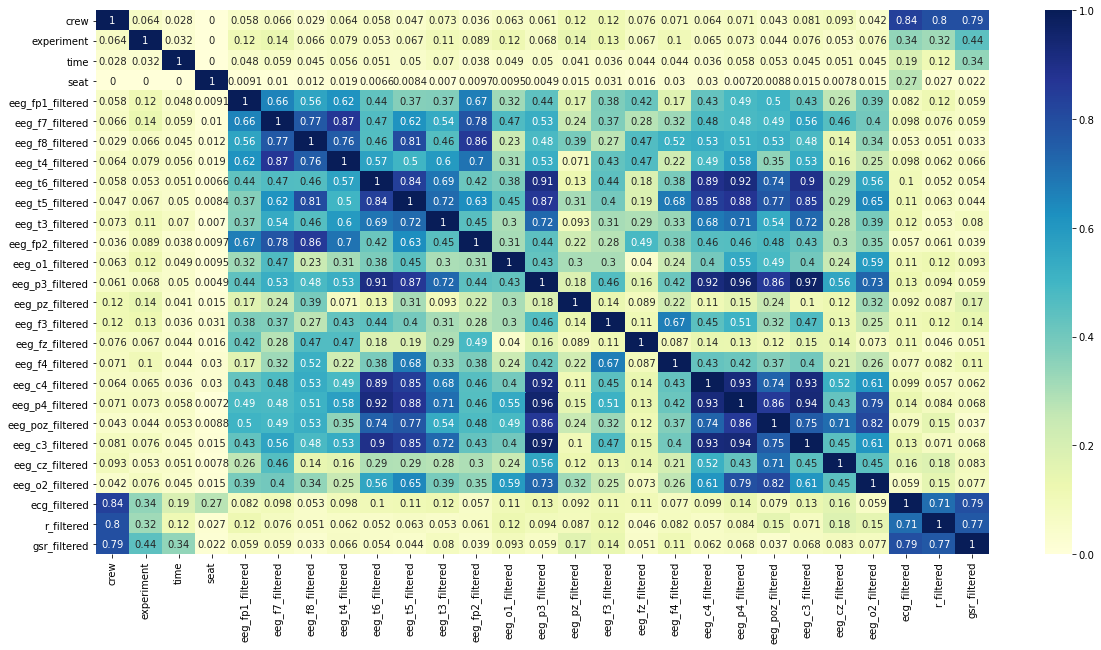

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(data.phik_matrix(), annot=True , cmap ='YlGnBu')

plt.savefig('heatmap.png')

## In above correlation matrix , we can see that some of eeg features are highly correlated (taking .9 as threshold)  but since we will generate new features such as vertical and horizontal traces of eeg signals, we keep them as of now and can drop after new features have been created.

## ecg , r and gsr not highly correlated, so we are keeping all of them

## Removing noise from Test data as well.

In [2]:
test_data = pd.read_csv("test.csv")

In [3]:
test_data.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [4]:
test_data.shape

(17965143, 28)

In [5]:
from scipy import signal

N = 4
cutoff_lowpass = 100  

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_ecg = signal.filtfilt(b, a, test_data['ecg'])

In [6]:
N = 5
cutoff_lowpass = 1  

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_r = signal.filtfilt(b, a, test_data['r'])

In [7]:
N = 3
cutoff_lowpass = 2 

b, a = signal.butter(N, cutoff_lowpass, btype='low',fs = 256)

y_gsr = signal.filtfilt(b, a, test_data['gsr'])

In [8]:
test_data['ecg_filtered'] = y_ecg
test_data['r_filtered'] = y_r
test_data['gsr_filtered'] = y_gsr

In [13]:
for eeg_f in eeg_features:
    
    filtered_eeg = filter_bycolumnindex(test_data,eeg_f)
    
    test_data[eeg_f+'_filtered'] = filtered_eeg

In [15]:
test_data.drop(['eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr'],axis=1,inplace=True)

In [16]:
test_data.shape

(17965143, 28)

In [18]:
import pickle
pickle.dump(test_data, open('test_data_filtered', 'wb'))